In [1]:
%pylab inline

# signal package needed for producing periodograms
from scipy import signal

Populating the interactive namespace from numpy and matplotlib


In [2]:
# a function to parse text files into average PSD 

def process_text_file(file):
    txtdat = np.loadtxt(file)
    if (txtdat.ndim == 1):
        txtdat = np.reshape(txtdat, (1,-1))
    nruns = txtdat.shape[0]    
    nsamp = txtdat.shape[1]//2
    print("INFO: found data for ", nruns, " runs.")
    print("INFO: number of sample times is ", nsamp, "(expecting 1538).")
    t = txtdat[...,:nsamp]  # ms
    v = txtdat[...,nsamp:]  # mV
    fsamp = 1.0/(t[0,1]-t[0,0])
    print("INFO:  sample frequency is ", fsamp, " kHz (expecting 76.9 kHz)")    
    f, psd = signal.periodogram(v, fsamp)
    psd = np.average(psd,axis=0)    
    T = nsamp / fsamp
    return T,f,psd


INFO: found data for  10  runs.
INFO: number of sample times is  1538 (expecting 1538).
INFO:  sample frequency is  76.9  kHz (expecting 76.9 kHz)
peak at  10.0  kHz


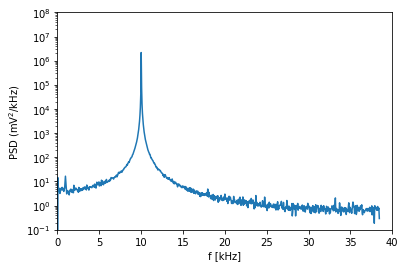

In [3]:
fsamp,f,psd = process_text_file("raw_waveforms.txt")


plt.plot(f,psd,label="data")
plt.semilogy()
plt.xlim(0,40.0)
plt.ylim(0.1,1E8)
plt.xlabel("f [kHz]")
plt.ylabel("PSD (${\\rm mV}^2/{\\rm kHz}$)")

# example finding peak in PSD:
fmax = f[np.argmax(psd)]
print("peak at ", fmax, " kHz")

vbm = 50
bmy = T * vbm**2 



